In [264]:
#LOADING LIBRARIES
!pip install --upgrade xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [265]:
# READING THE DATASET
data = pd.read_excel("/content/iris (2).xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [266]:
#CHECKING FOR NULL VALUES
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [267]:
#CHECKING DATASET INFORMATION
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [268]:
#DROPPING NULL VALUES
data1 = data.dropna()
data1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**Logistic Regression**

In [269]:
#Splitting x and y (i.e features and target)
x = data1.drop('Classification',axis=1)
y = data1['Classification']

In [270]:
from sklearn.model_selection import train_test_split


In [271]:
#Splitting training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [272]:
#Importing logistic regression model and building the model
from sklearn.linear_model import LogisticRegression

In [273]:
logit_model = LogisticRegression()
logit_model = logit_model.fit(x_train,y_train)
y_pred_lg = logit_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [274]:
print(y_pred_lg)

['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']


In [275]:
from sklearn.metrics import confusion_matrix

In [276]:
#Checking Confusion matrix
confusion_matrix(y_test, y_pred_lg)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

In [277]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [278]:
#Checking precision score of the model
precision_score(y_test, y_pred_lg,average='micro')

1.0

In [279]:
#Checking recall score of the model
recall_score(y_test, y_pred_lg,average='micro')

1.0

In [280]:
#Checking accuracy score of the model
accuracy_score(y_test, y_pred_lg)

1.0

**kNN Classification**

In [281]:
from sklearn.neighbors import KNeighborsClassifier

In [282]:
#Building kNN model and checking value of neighbors for which pediction score and accuracy is high
metric_k = []
neighbors = range(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(x_train, y_train)
  y_pred_kNN = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_pred_kNN)
  metric_k.append(acc)


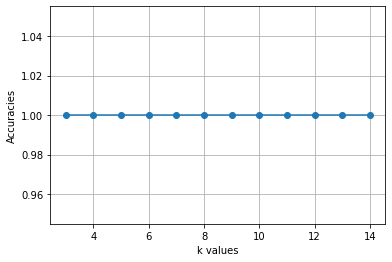

In [283]:
plt.plot(neighbors, metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [284]:
confusion_matrix(y_test,y_pred_kNN)


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

In [285]:
precision_score(y_test, y_pred_kNN,average='micro')


1.0

In [286]:
recall_score(y_test, y_pred_kNN,average='micro')

1.0

In [287]:
acc = accuracy_score(y_test, y_pred_kNN)
acc

1.0

In [288]:
precision_score(y_test, y_pred_kNN,average='micro')

1.0

**SVM Classification**

In [289]:
#Importing logistic regression model from sklearn
from sklearn.svm import SVC

In [290]:
#Building SVM model for linear kernel
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(x_train,y_train)
y_pred_sm = svm_clf.predict(x_test) 

In [291]:
confusion_matrix(y_test, y_pred_sm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

In [292]:
accuracy_score(y_test,y_pred_sm)

1.0

In [293]:
#Building SVM model for linear kernel
svm_clf2 = SVC(kernel='rbf')
svm_clf2 = svm_clf2.fit(x_train,y_train)
y_pred_sm2 = svm_clf2.predict(x_test) 

In [294]:
confusion_matrix(y_test, y_pred_sm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

In [295]:
accuracy_score(y_test,y_pred_sm2)

1.0

**Decision Tree**

In [296]:
from sklearn.tree import DecisionTreeClassifier

In [297]:
#Building Decision Tree model
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train,y_train)
y_pred_dt = dt_clf.predict(x_test)

In [298]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

In [299]:
accuracy_score(y_test,y_pred_dt)

1.0

**Random Forest Algorithm**

In [300]:
from sklearn.ensemble import RandomForestClassifier

In [301]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)

In [302]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

In [303]:
accuracy_score(y_test,y_pred_rf)

1.0